<a href="https://colab.research.google.com/github/farihane-redouan/BASIC-ALGORITHMS-MACHINE-DEEP-LEARNING/blob/main/Basic-machine-learning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression

## **1. Dataset**

In [20]:
n=100
x=np.linspace(0,10,n).reshape(n,1) #géniration d'un liste de nombre de taille 100 comprise entre 0 et 10 
y=x**2+x*np.random.randn(n,1)
print(np.shape(x),np.shape(y))

(100, 1) (100, 1)


## **2. TrainSet/TestSet**

In [21]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)
print(np.shape(x_train))

(70, 1)


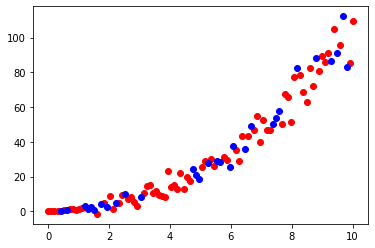

In [44]:
plt.scatter(x_train,y_train, c='r')
plt.scatter(x_test,y_test, c='b')

In [45]:
X=np.hstack((x_train,np.ones((np.shape(x_train)[0],1))))
X=np.hstack(((x_train)**2,X))
X=np.hstack(((x_train)**3,X))
print(X.shape)

(70, 4)


In [46]:
np.random.seed(0)
teta =np.random.randn(4,1)
teta

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ]])

## **3. Modele Linéaire**

In [47]:
def model(data,teta):
  return data.dot(teta)

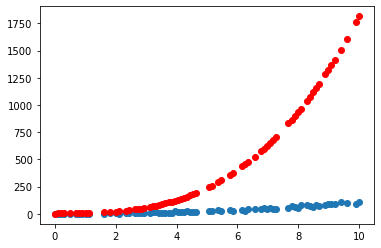

In [48]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,model(X,teta),c='r')

## **4. Fonction Cout : Erreur Quadratique moyenne**

In [49]:
def Fonction_Cout(x,teta,y):
  m=len(y)
  return (1/2*m)*np.sum(((model(x,teta))-y)**2)

In [30]:
def Gradients(x,teta,y):
  m=len(y)
  return (1/m)*(x.T).dot((model(x,teta))-y)

## **6. Gradients et Descente de Gradient**

In [50]:
def Descente_Gradient(x,teta,y,rate,nb_iteration):
  cost_history=np.zeros(nb_iteration)  # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
  for i in range(0,nb_iteration):
    teta=teta-rate*Gradients(x,teta,y) # mise a jour du parametre theta (formule du gradient descent)
    cost_history[i]=Fonction_Cout(x,teta,y) # on enregistre la valeur du Cout au tour i dans cost_history[i]
  return teta,cost_history


## **7. Phase d'entrainement**

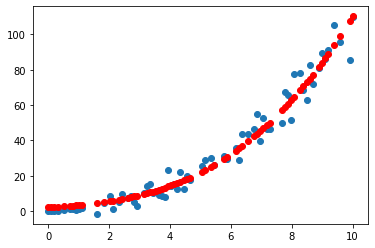

In [51]:
nb_iteration=1000
learning_rate=0.000001
teta_final,cost_history=Descente_Gradient(X,teta,y_train,learning_rate,nb_iteration)
predection=model(X,teta_final)
plt.scatter(x_train,y_train)
plt.scatter(x_train,predection,c='r')

In [52]:
def cof_determination(y,pred):
  a=((y-pred)**2).sum()
  b=((y-y.mean())**2).sum()
  return 1-a/b

## **8.Evaluation par l'ensmble d'entrainement**

In [58]:
cof_determination(y_train,predection) #cof_determination par rapport à l'ensmble d'entrainement

0.968162670853478

## **9.Evaluation par l'ensmble Test**

In [59]:
XT=np.hstack((x_test,np.ones((np.shape(x_test)[0],1))))
XT=np.hstack(((x_test)**2,XT))
XT=np.hstack(((x_test)**3,XT))
print(XT.shape)

(30, 4)


In [60]:
predection2=model(XT,teta_final)

In [62]:
cof_determination(y_test,predection2) #cof_determination par rapport à l'ensmble Test --> ca qu'il faut faire normalement !!!! si non Nous tomberons dans le problème sur apprentissage

0.9623948069726403